# 03. Exploratory Data Analysis (EDA)

**Objective:** Validate data range and distribution to plan the Power BI dashboard strategy.

### Findings Summary
1.  **Timeframe:** Data is restricted to **Nov-Dec 2025**. No historical data for Year-over-Year comparison.
2.  **Geography:** Sales are evenly distributed across all 7 countries (Colombia, Peru, Spain, Mexico, Chile, Argentina, USA).
3.  **Products:** The portfolio is balanced; the top 5 products (Queso, Yogurt, Chocolate, etc.) share similar revenue figures.

### Imports and Configuration

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os

# Add src to path
sys.path.append(os.path.abspath(os.path.join('..', 'src')))
from database.db_connection import get_db_engine

# Visual settings
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

### Load Clean Data

In [2]:
engine = get_db_engine()
query = "SELECT * FROM clean_sales"

try:
    df = pd.read_sql(query, engine)
    df['Fecha'] = pd.to_datetime(df['Fecha']) # Ensure datetime
    print(f"Loaded {len(df)} rows.")
except Exception as e:
    print(f"Error: {e}")

Successfully created engine for database: riwi_ventas_db
Loaded 935966 rows.


### Feature Engineering (Time)


In [3]:
# Extract time features
df['Year'] = df['Fecha'].dt.year
df['Month'] = df['Fecha'].dt.month
df['Month_Name'] = df['Fecha'].dt.strftime('%B')

# --- CRITICAL CHECK ---
years_present = df['Year'].unique()
print(f"Years available in dataset: {years_present}")

# Check month distribution
print("\nMonths available:")
print(df['Month_Name'].unique())

Years available in dataset: [2025]

Months available:
['November' 'December']


### Sales Analysis by Country
Preparation for Choropleth Map

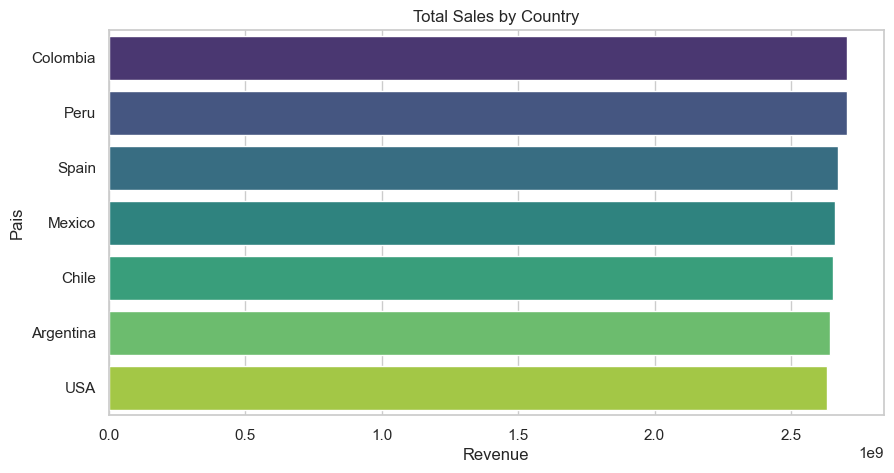

In [4]:
# Aggregation by Country
country_sales = df.groupby('Pais')['Total'].sum().sort_values(ascending=False).reset_index()

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(data=country_sales, x='Total', y='Pais', palette='viridis', hue='Pais', legend=False)
plt.title('Total Sales by Country')
plt.xlabel('Revenue')
plt.show()

### Top 5 Products

In [7]:
# Top 5 Products
top_products = df.groupby('Producto')['Total'].sum().sort_values(ascending=False).head(5).reset_index()

print("--- TOP 5 PRODUCTS ---")
display(top_products)

--- TOP 5 PRODUCTS ---


,Producto,Total
0,Queso,2.359645e+09
1,Yogurt,2.345973e+09
2,Chocolate,2.325171e+09
3,Café,2.323073e+09
4,Arepa,2.319537e+09


## Analysis Conclusion for Power BI

Given the lack of historical data (2024 vs 2025), the dashboard strategy will pivot to:
- **Short-term Trend:** Daily/Weekly performance during Nov-Dec.
- **Regional Balance:** Choropleth map to visualize the uniform spread.
- **Category Focus:** Drill-down into specific product types.

**Next Step:** Data Modeling in Power BI.